# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 2: n-gram Language Models and Hierarchical Clustering **

### **Total points: 100**

In this assignment, You will be learning character level language models and hierarchical Clustering by implementing it. 

Solution by: **Sumukh Vasisht Shankar**

## <CENTER>PART-A 

### OBJECTIVE : 

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [1]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [3]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 2
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram = n_gram-1
threshold = 1

### TASK - 1  = 20 points :
Implement training function

In [4]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """

    n_grams=[]
    for i in range(0,len(tokens)-n+1):
        n_grams.append(tuple(tokens[i:i+n]))
    return n_grams

In [5]:
def make_ngrams_temp(tokens, n):
    n_grams = []
    for i in tokens:
        for j in range(0,len(i)-n+1):
            n_grams.append(tuple(i[j:j+n]))       
  
    return n_grams    

In [6]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as fh:
        content = fh.read().split('\n') # Read and split data to get list of words

    tokenized_sentences=[]
    for i in content:
        l=i.split(" ")
        tokenized_sentences.append(l)

    counter={}
    for i in tokenized_sentences:
        for j in i:
            if j in counter.keys():
                counter[j]=counter[j]+1
            else:
                counter[j]=1
                
    vocab = []
    
    for i in counter.keys():
        if counter[i]>1:
            vocab.append(i)

    replaced_tokenized_sentences=[]
    for i in tokenized_sentences:
        replaced_sentence = []
        for j in i:
            if j in vocab:
                replaced_sentence.append(j)
            else:
                replaced_sentence.append("<UNK>")
      
        replaced_tokenized_sentences.append(replaced_sentence)
        
    # make use of make_n_grams function
    n_grams=make_ngrams_temp(replaced_tokenized_sentences,n_gram)
    n_gram_counts=Counter(n_grams)
    # Get the training data vocabulary
    # For n>1 grams compute n-1 gram counts to compute probability
    if n_gram>1:
        n_1_grams=make_ngrams_temp(replaced_tokenized_sentences,n_gram-1)
        n_minus_1_gram_counts=Counter(n_1_grams)
    else:
        n_1_grams={}
        n_minus_1_gram_counts={}
    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [8]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("train_data/berp-training_bi.txt")
# print(n_gram_counts)
# print(vocab)
print(len(n_gram_counts.keys()))

8533


### TASK - 2  = 15 points :
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

## Unigram

In [31]:
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK>     
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability

    tokens = sentence.split(' ') 
    
    replaced_sentence=[]  
    for token in tokens:
        if token not in vocab:
            replaced_sentence.append("<UNK>")
        else:
            replaced_sentence.append(token)
    
    ngrams = make_ngrams(replaced_sentence,n_gram)
    
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    probabilities = []
    if n_gram > 1:
        for i in ngrams:
            p = (n_gram_counts[i]+1)/(n_minus_1_gram_counts[(i[0:n_gram-1],)] + len(vocab))        
            probabilities.append(np.log(p))
    else:
        for i in ngrams:
            # print(i)
            p=(n_gram_counts[i]+1)/len(vocab)
            probabilities.append(np.log(p))
            # print(p)

    probability=0
    for p in probabilities:
        probability = probability + p
    
    return np.exp(probability)

In [10]:
n_gram = 2
with open("test_data/hw2-test_uni.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [11]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence))
    # break
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)
print(mean)
print(std_dev)

[5.93235151e-08 2.15047742e-06 3.08302725e-14 2.80074496e-12
 3.93347733e-17 2.26981455e-11 5.29087473e-11 4.45830173e-21
 1.25662057e-14 3.97920484e-03 1.90759491e-08 3.24514780e-09
 2.24810836e-12 1.48311689e-04 8.45269324e-10 7.96865982e-05
 2.05416179e-04 6.01782609e-05 1.43102700e-10 5.47994485e-19
 9.30789373e-31 4.58211372e-29 4.17861112e-16 4.93327200e-12
 3.37425228e-14 3.25382424e-08 3.34291182e-04 8.78009605e-08
 7.41241223e-18 6.23838801e-09 1.20841556e-06 4.06462318e-11
 1.77939959e-10 1.19025044e-07 9.52963855e-15 1.93490280e-12
 4.79471126e-05 2.91201229e-05 4.38788736e-10 4.77130970e-08
 9.31738644e-11 1.37858960e-09 9.11519007e-09 2.77366960e-14
 1.73116311e-11 1.30628638e-13 1.20559447e-09 7.40717245e-09
 2.84615948e-15 1.38385096e-17 4.21441246e-19 1.23202393e-12
 1.35951243e-04 4.94393346e-03 4.94393346e-03 4.86741720e-11
 4.04788061e-10 1.87809078e-05 2.36873751e-06 1.12042564e-11
 3.24040350e-02 1.81351121e-11 8.04963831e-14 1.62603925e-10
 5.00335477e-19 1.736182

## Bigram

In [ ]:
n_gram = 2
n_gram_counts, vocab, n_minus_1_gram_counts = train("train_data/berp-training_bi.txt")
print(n_gram_counts)
print(vocab)

In [ ]:
with open("test_data/hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

In [ ]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence))
    # break
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)
print(mean)
print(std_dev)

## Trigram

In [ ]:
n_gram = 3
n_gram_counts, vocab, n_minus_1_gram_counts = train("train_data/berp-training-tri.txt")
print(n_gram_counts)
print(vocab)

In [ ]:
with open("test_data/hw2-test-tri.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

In [ ]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence))
    # break
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)
print(mean)
print(std_dev)

### TASK - 3  = 10 points :
Generate sentence from the above trained model

In [38]:
import random

def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    # Append sentence begin markers for n>2
    # Keep track of previous word for stop condition
    
    # remove_key = s.pop("in_stock", None)
    
    if n_gram > 1:
        generated_sentence = []
        start = 0
        tokens = ['<s>']*(n_gram - 1)
        tupleList = []
        for key, value in n_gram_counts.items():
            if(key[:n_gram-1] == tuple(tokens)):
                if('<UNK>' not in key):
                    tupleList.append(key)
        randomChoice = random.choice(tupleList)
        n_gram_counts.pop(randomChoice, None)
        # print(randomChoice)
        generated_sentence.append(randomChoice)
        # print(generated_sentence)
        prev_word = generated_sentence[0][-1]
        # print('Prev = ', prev_word)
        while prev_word != "</s>":
            tupleList = []
            for key, value in n_gram_counts.items():
                if(key[start:n_gram-1] == generated_sentence[-1][-n_gram+1:]):
                    if('<UNK>' not in key):
                        tupleList.append(key)
                                         
            maxProb = 0
            nextTup = None
            newList = []
            for tup in tupleList:
                prob = (n_gram_counts[tup] + 1)/(n_minus_1_gram_counts[tup[:n_gram-1]] + len(vocab))
                if(prob > maxProb):
                    maxProb = prob
                    nextTup = tup
                # prob = (n_gram_counts[tup])/(n_minus_1_gram_counts[tup[:n_gram-1]] + len(vocab))
                # if(prob > 0):
                #     newList.append(tup)
            # randomChoice = random.choice(newList)   
            generated_sentence.append(nextTup)
            # generated_sentence.append(randomChoice)
            # print(generated_sentence[-1])
            prev_word = generated_sentence[-1][-1]

        # Construct the (n-1) gram so far
        # Get the counts of all available choices based on n-1 gram
        # Convert the counts into probability for random.choice() function
        # If <s> is generated, ignore and generate another word
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
        generated_sentence = ''
        for i in range(10):
            randomChoice = random.choice(vocab)
            generated_sentence += randomChoice + ' '
            if(randomChoice == '</s>'):
                break
        return generated_sentence
        # Convert the counts into probability for random.choice() function
        # If <s> is generated, ignore and generate another word

    # Append sentence end markers for n>2
    
    sentence = ' '.join(generated_sentence[0]) + ' '
    for i in range(1, len(generated_sentence)):
        # print('----------')
        # print(generated_sentence[i][-1])
        sen = generated_sentence[i][-1] + ' '
        sentence += sen 
    
    return sentence

In [39]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    sentences = []
    for i in range(n):
        sentences.append(generate_sentence())
    # Generate sentences one by one and store
    return sentences

In [40]:
sentences = generate(10)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s> japanese food </s> 
<s> tomorrow </s> 
<s> spats  </s> 
<s> where can you have a restaurant </s> 
<s> lunch </s> 
<s> tuesdays </s> 
<s> actually i want to eat on saturday </s> 
<s> french food </s> 
<s> between ten dollars </s> 
<s> should be less than ten dollars </s> 


### TASK - 4  = 5 points :
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [41]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 
    tokens = test_sequence.split(" ")
    n = 0
    for i in tokens:
        if(i != '<s>'):
            n+=1 
    
    if(n_gram>1):
    
        prob = 1
        firstProb = (n_gram_counts[tuple(tokens[:n_gram])]+1)/len(vocab)
        prob = prob * firstProb
        start = 1

        while(start!=len(tokens)-n_gram):
            try:
                # print('Prob first = ', prob)
                numTuple = tuple(tokens[start:start+n_gram])
                denTuple = numTuple[:n_gram-1]
                start += 1
                if(n_gram_counts[numTuple]!=0):
                    tempProb = (n_gram_counts[numTuple]+1)/(n_minus_1_gram_counts[denTuple]+len(vocab))
                    # print(tempProb)
                    prob = prob * tempProb
                    print('Prob = ', prob)
            except:
                prob = prob * 1

    # test_sequence.replace("<s>", "")
    # test_sequence.replace("</s>", "")

        # prob = score(test_sequence)
            
        value = 1/prob

        perplexity = value**(1/n)
    
    # print(prob)
        
    else:
        prob = 1
        for token in tokens:
            prob = prob * ((n_gram_counts[tuple([token])]+1)/len(vocab))
        value = 1/prob
        
        perplexity = value**(1/n)
        
          

    # Replace out of vocab words with <UNK>, already done in score function
    # test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]


    # Remove sentence begin markers from data for computing N
    # Get the probability for the sequence
    
    return perplexity

In [42]:
print(sentences[0:10])
print(perplexity(" ".join(sentences[0:10])))

['<s> japanese food </s> ', '<s> tomorrow </s> ', '<s> spats  </s> ', '<s> where can you have a restaurant </s> ', '<s> lunch </s> ', '<s> tuesdays </s> ', '<s> actually i want to eat on saturday </s> ', '<s> french food </s> ', '<s> between ten dollars </s> ', '<s> should be less than ten dollars </s> ']
Prob =  2.836758719487114e-05
Prob =  7.732574681839549e-06
Prob =  1.8259673273337744e-07
Prob =  1.1618031775188384e-09
Prob =  7.475536838953181e-10
Prob =  5.155542647553918e-11
Prob =  5.693237279507394e-12
Prob =  4.562811104875962e-13
Prob =  2.3761508060988857e-14
Prob =  1.070338200945444e-15
Prob =  1.111126384687123e-16
Prob =  1.2366054690462254e-17
Prob =  6.669932411252565e-20
Prob =  7.7639424892887e-22
Prob =  1.8124798280611208e-22
Prob =  5.642723198346232e-23
Prob =  1.1208400111149376e-23
Prob =  7.566554018252261e-25
Prob =  3.245849473371223e-26
Prob =  1.6756775483943215e-27
Prob =  4.811351376577755e-29
Prob =  1.311501524059315e-29
Prob =  1.5074730161601322e-

### **Theory: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.


# <CENTER> PART-B</CENTER> 

### OBJECTIVE : In this unsupervised learning task we are going to cluster wikipedia articles into groups using Hierarchical clustering

# **TASK-1 : 5 Points**
## Download articles from Wikipedia
In this section we will download articles from wikipedia and then cluster them into groups in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [43]:
import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd

'''
 Generate a list of wikipedia article titles to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse datset to work with. 
 Ex- About 10+ categories with 3+ article in each category
'''
# list of articles to be downloaded
articles = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", 
            "Artificial intelligence", "Data science", "Master in Data Science", 
            "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
            "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

# download and store all the articles in this variable
data = []
for article in articles:
    try:
        summary = wikipedia.summary(article)
        data.append(summary)
    except:
        pass

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [44]:
print(data)

['Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.', 'Quantum machine learning is the integration of quantum algorithms within machine learning programs. The most common use of the term refers to machine learning algorithms for the analysis of classical data executed on a quantum computer, i.e. quantum-enhanced machine lea

# **TASK-2 : 5 Points**
# Cleaning the Data
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1

**Answer(1-3 sentences):** Why are you (or not) choosing to clean the data? Think in terms of whether cleaning the data will help in the clustering or not.

**Answer**: I am not choosing to clean the data. I feel it is not required to clean the message and we are anyways getting vector count of words using tfidf vectorizer and cleaning the data will be of no benifit while performing the clustering. 

In [45]:
# You can use Assignment 1's clean message function
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [46]:
def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    # message = message.lower()
    # message = re.sub(r'^https?:\/\/.*[\r\n]*', '', message, flags=re.MULTILINE)
    # tokenizer = nltk.RegexpTokenizer(r"\w+")
    # message = tokenizer.tokenize(message)
    # # print(message)    
    # messages_cleaned = []
    # stop_words = set(stopwords.words('english'))
    # for word in message:
    #     if not word in stop_words:
    #         messages_cleaned.append(word)
    
    message = message.lower().strip()
    message = re.sub(r"<br>", r" ", message)
    message = re.sub(r"([-?.!,/\"])", r" \1", message)
    message = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", r"", message)
    message = re.sub(r"[ ]+", r" ", message)
    message = message.rstrip().strip()
    
    ps = PorterStemmer()
    
    message = message.split()
    messages_cleaned = [ps.stem(word) for word in message if word not in stopwords.words('english')]

    return messages_cleaned

In [47]:
cleaned_articles = []
for i in data:
    cleaned = clean_message(i)
    cleaned_articles.append(cleaned)
print(cleaned_articles)

[['natur', 'languag', 'process', 'nlp', 'subfield', 'linguist', 'comput', 'scienc', 'artifici', 'intellig', 'concern', 'interact', 'comput', 'human', 'languag', 'particular', 'program', 'comput', 'process', 'analyz', 'larg', 'amount', 'natur', 'languag', 'data', 'goal', 'comput', 'capabl', 'understand', 'content', 'document', 'includ', 'contextu', 'nuanc', 'languag', 'within', 'technolog', 'accur', 'extract', 'inform', 'insight', 'contain', 'document', 'well', 'categor', 'organ', 'document', 'challeng', 'natur', 'languag', 'process', 'frequent', 'involv', 'speech', 'recognit', 'natur', 'languag', 'understand', 'natur', 'languag', 'gener'], ['quantum', 'machin', 'learn', 'integr', 'quantum', 'algorithm', 'within', 'machin', 'learn', 'program', 'common', 'use', 'term', 'refer', 'machin', 'learn', 'algorithm', 'analysi', 'classic', 'data', 'execut', 'quantum', 'comput', 'e', 'quantum', 'enhanc', 'machin', 'learn', 'machin', 'learn', 'algorithm', 'use', 'comput', 'immens', 'quantiti', 'dat

# **TASK-3 : 10 Points**
## Vectorize the articles(5 points)
In this step, we will vectorize the text data to use in hierarchical clustering. You can use countVectorizer() or TfidfVectorizer() from sklearn library.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tfidf_wm = tfidfvectorizer.fit_transform(data)
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = [i for i in range(1,14)],columns = tfidf_tokens)
print(df_tfidfvect)

          11        12       185      1888      18th       190      1930  \
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.043796  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.041809  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.036836  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.053693  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13  0.036398

## Plot Dendogram (5 points)
Now we will try to see the hierarchical relationship between articles using dendrogram.

In [51]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
import seaborn as sns
from sklearn import metrics

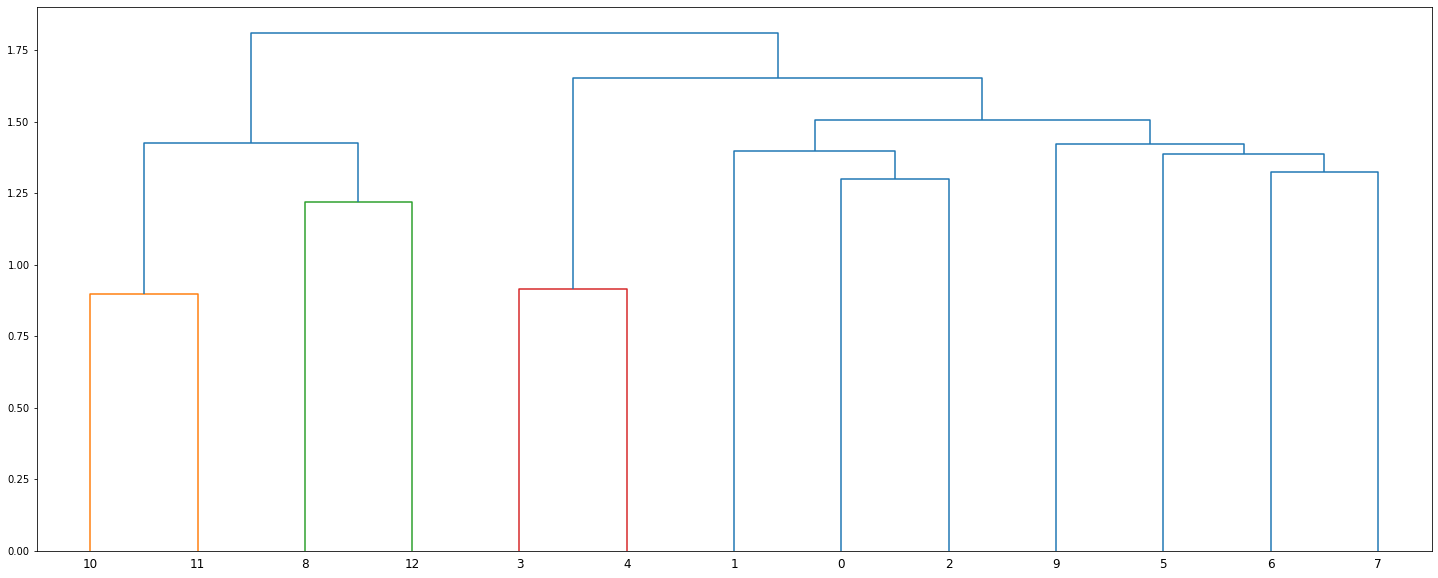

In [52]:
plt.figure(figsize=(25, 10))
dendrogram = shc.dendrogram(shc.linkage(df_tfidfvect, method='ward'))
plt.show()

After plotting the dendogram, you will see that if you cut the dendogram horizontally, you can seperate the data into groups. You will get different number of clusters depending on where you cut.

# **TASK-4 : 5 Points**
# Apply Clustering
In this step, we will assign cluster lables to each document/group using Agglomerative Hierarchical clustering.
We can decide number of clusters based on the dendogram and our requirement (how many categories we want).(eg. n_clusters = 3) 

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(df_tfidfvect)
labels = model.labels_

In [55]:
labels

array([3, 3, 3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
data[0]+data[1]

'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.Quantum machine learning is the integration of quantum algorithms within machine learning programs. The most common use of the term refers to machine learning algorithms for the analysis of classical data executed on a quantum computer, i.e. quantum-enhanced machine learning

In [57]:
data_clusters={}
data_clusters[0]=data[8]+" "+data[10]+" "+data[11]+" "+data[12]
data_clusters[1]=data[5]+" "+data[6]+" "+data[9]+" "+data[10]
data_clusters[2]=data[4]+" "+data[5]
data_clusters[3]=data[1]+" "+data[2]+" "+data[3]

IndexError: list index out of range

# **TASK-5 : 5 Points**
# Word Clouds
Now, we will try to visualize top 50 words in each cluster using word clouds

In [58]:
from wordcloud import WordCloud

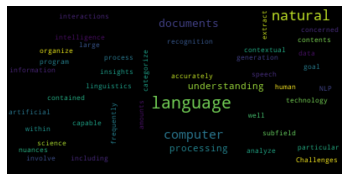

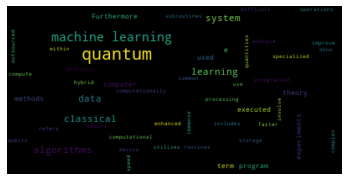

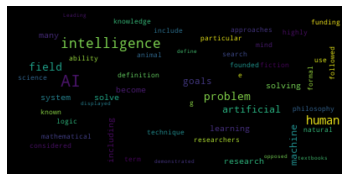

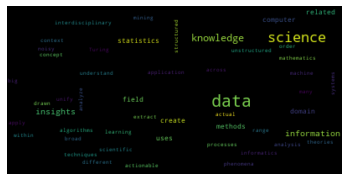

In [59]:
num_clusters=4

for k in range(0, num_clusters):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=20, max_words=50).generate(data[k])

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Comment about the categorizion done by Hierarchical clustering. Are the groups meaningful?

Yes, the groups are meaningful.
In wordcloud 1, we can see that all words are related to schools and sports
In wordcloud 2, we can see that all words are related to languages, documents, insights, linguistics and such
In wordcloud 3, we can see that all words are related to algorithms, computing, machine learning
In wordcloud 4, we can see that all words are related to AI
So the wordclouds are meaningful and the words are clustered in a proper manner

# **TASK-6 : 10 Points**
# Apply Hierarchical clustering on spam dataset
Now we will apply Hierarchical clustering(HC) on a subset(modify the fraction argument of the sample() function) of Assignment 1 data. We will try to see if Hierarchical clustering can perform good or not for a supervised problem. We will follow the same steps as above and apply HC on the message column of spam.csv and categorize them into two clusters.

In [60]:
from sklearn.utils import resample
import pandas as pd
# Read the data as done in Assignment 1
## Reading the data and removing columns that are not important. 
## Renaming the columns so that we understand the columns easily.

In [61]:
df=pd.read_csv("spam.csv", encoding='latin-1')
df=df[['v1','v2']]

In [62]:
df=df.rename({'v1':'Label','v2':'Messages'},axis=1)

In [63]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tfidf_wm = tfidfvectorizer.fit_transform(list(df['Messages']))
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = [i for i in range(1,5573)],columns = tfidf_tokens)

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
print('Model ready')
model.fit(df_tfidfvect)
labels = model.labels_

In [ ]:
C_0=[]
C_1=[]

for i in range(0,len(labels)):
    if labels[i]==0:
        C_0.append(df['Messages'][i])
    else:
        C_1.append(df['Messages'][i])

print(C_0)
print(C_1)

In [ ]:
cluster={0:[],1:[]}
zero_string=''
one_string=''
for i in range(0,len(labels)):
    if labels[i]==0:
        zero_string=zero_string+" "+df['Messages'][i]
    else:
        one_string=one_string+" "+df['Messages'][i]

cluster[0]=zero_string
cluster[1]=one_string

num_clusters=2
for k in range(0, num_clusters):
    wordcloud = WordCloud(max_font_size=20, max_words=500).generate(cluster[k])

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Task 7 Conclusion(5 points)
Did Hierarchical clustering work as intended for spam classification? Why? 
(3-5 sentences)

No, hierarchial clustering did not work as intended for spam classification. Use of different distance metrics for measuring distances between clusters may generate different results. So, multiple experiments need to be performed and results compared to support the veracity of the original results.
Looking at the wordcloud, it looks like clustering hasn't been done very well. This may be because it is sensitive to noise and outliers. While working on Assignment 1, we saw many such outliers where a spam message looked good enough to be classified as ham. It gives the best result only in some of the cases because it never undo what was done previously so if objects are incorrectly grouped at an earlier stage, it can’t be corrected.

Moreover, time and space complexity is high so not suitable for large dataset.